# FFT
1. numpy fft package
    > fft Fast DFT <br>
    > ifft Inverse Fast DFT

In [210]:
import numpy as np
import math
import warnings
from matplotlib import pyplot as plt
from collections import Counter


# load example signal
t = np.arange(0, 1, 0.01)
signal = (100 * np.sin(2 * np.pi * 510 * t) +  
         250 * np.cos(2 * np.pi * 105 * t) +  
         500 * np.sin(2 * np.pi * 435 * t) +  
         750 * np.cos(2 * np.pi * 122 * t) +   
         1050 * np.sin(2 * np.pi * 905 * t) +  
         2150 * np.cos(2 * np.pi * 496 * t) +  
         2350 * np.sin(2 * np.pi * 246 * t) +  
         3500 * np.random.randn(len(t)))

In [211]:
# FFT calculation
fft_result = np.fft.fft(signal)

In [212]:
# gain frequency information
sampling_rate = 100  # 采样率
frequencies = np.fft.fftfreq(len(signal), d=1/sampling_rate)

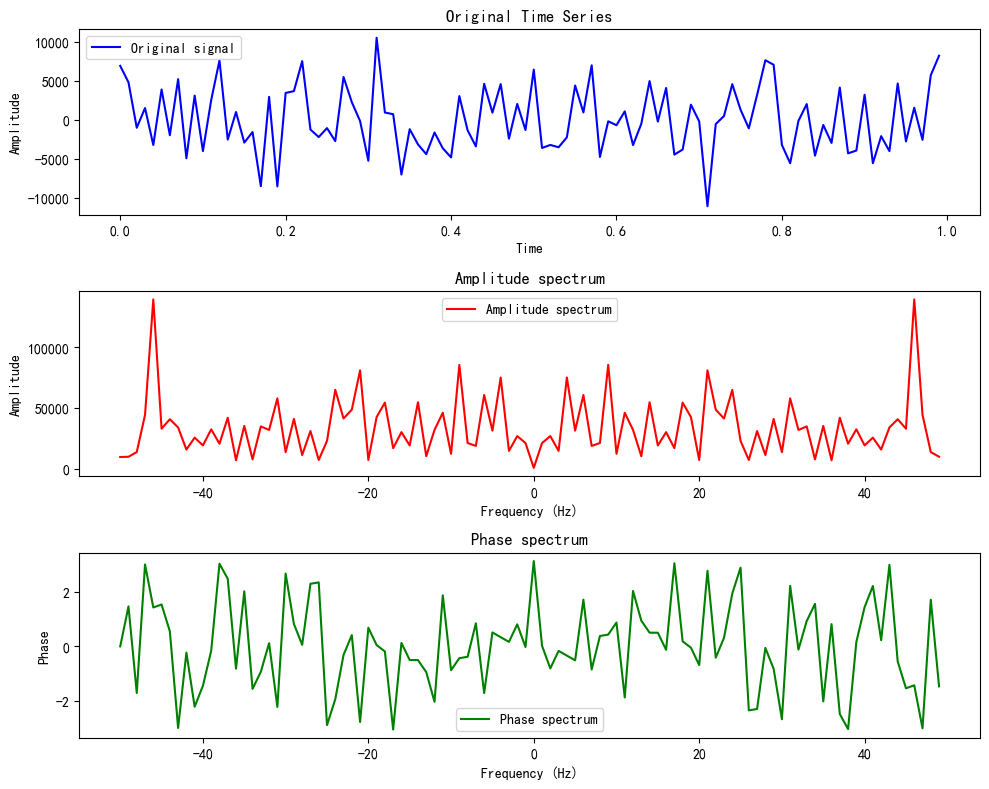

In [213]:
%matplotlib inline

fig, ax = plt.subplots(3, 1, figsize=(10, 8))
fig.subplots_adjust(hspace=0.15)

sub_fig1 = ax[0]
sub_fig2 = ax[1]
sub_fig3 = ax[2]

sub_fig1.plot(t, signal, 'b', label='Original signal')
sub_fig1.set_title("Original Time Series")
sub_fig1.set_xlabel('Time')
sub_fig1.set_ylabel('Amplitude')
sub_fig1.legend()

sub_fig2.plot(frequencies[frequencies.argsort()], np.abs(fft_result[frequencies.argsort()]), 
            'r', label='Amplitude spectrum')
sub_fig2.set_title("Amplitude spectrum")
sub_fig2.set_xlabel('Frequency (Hz)')
sub_fig2.set_ylabel('Amplitude')
sub_fig2.legend()

sub_fig3.plot(frequencies[frequencies.argsort()], np.angle(fft_result[frequencies.argsort()]), 
            'g', label='Phase spectrum')
sub_fig3.set_title("Phase spectrum")
sub_fig3.set_xlabel('Frequency (Hz)')
sub_fig3.set_ylabel('Phase')
sub_fig3.legend()

plt.tight_layout()
plt.show()

# PCA and Restore
1. find top 50% sampling points
2. do inverse fft, compare feature selection restoration effect

In [214]:
# calculate power ratio of each sampling points
power_spec = []
power_ttl = 0
for i in fft_result:
    power_ttl = power_ttl + np.power(np.abs(i),2)
for i in fft_result:
    ps = np.power(np.abs(i),2)
    power_spec.append(ps/power_ttl)
power_spec = np.array(power_spec, dtype=np.float64)
power_spec_cumsum = np.cumsum(power_spec)

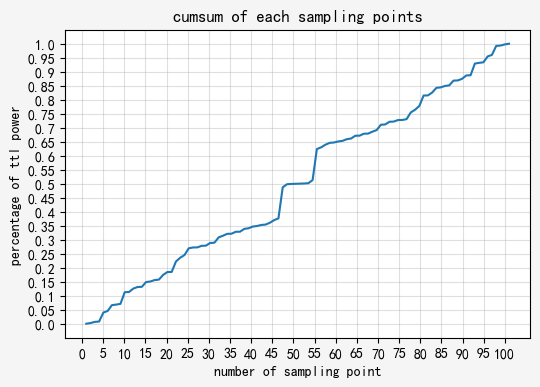

In [215]:
# draw power ratio graph
%matplotlib inline

plt.rcParams["font.sans-serif"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False

fig,ax = plt.subplots(1,1,figsize=(6,4),
                    facecolor='whitesmoke',
                    edgecolor='gray')
ax.plot(np.linspace(1,101,100),power_spec_cumsum)
ax.set_title("cumsum of each sampling points")
ax.set_yticks(np.arange(0,1.05,0.05))
ax.set_yticklabels(labels=np.round(np.arange(0,1.05,0.05),2))
ax.set_xticks(np.arange(0,105,5))
ax.set_xticklabels(labels=np.round(np.arange(0,105,5),2))
ax.set_xlabel("number of sampling point")
ax.set_ylabel("percentage of ttl power")
ax.grid(alpha=0.4)

In [219]:
# partially ifft
power_spec_ind = power_spec.argsort()[:80]
power_spce_str = []
fft_result_slice = fft_result[power_spec_ind]
fft_pitime = np.fft.ifft(fft_result_slice,n=100)

In [220]:
# fully ifft
fft_fitime = np.fft.ifft(fft_result)

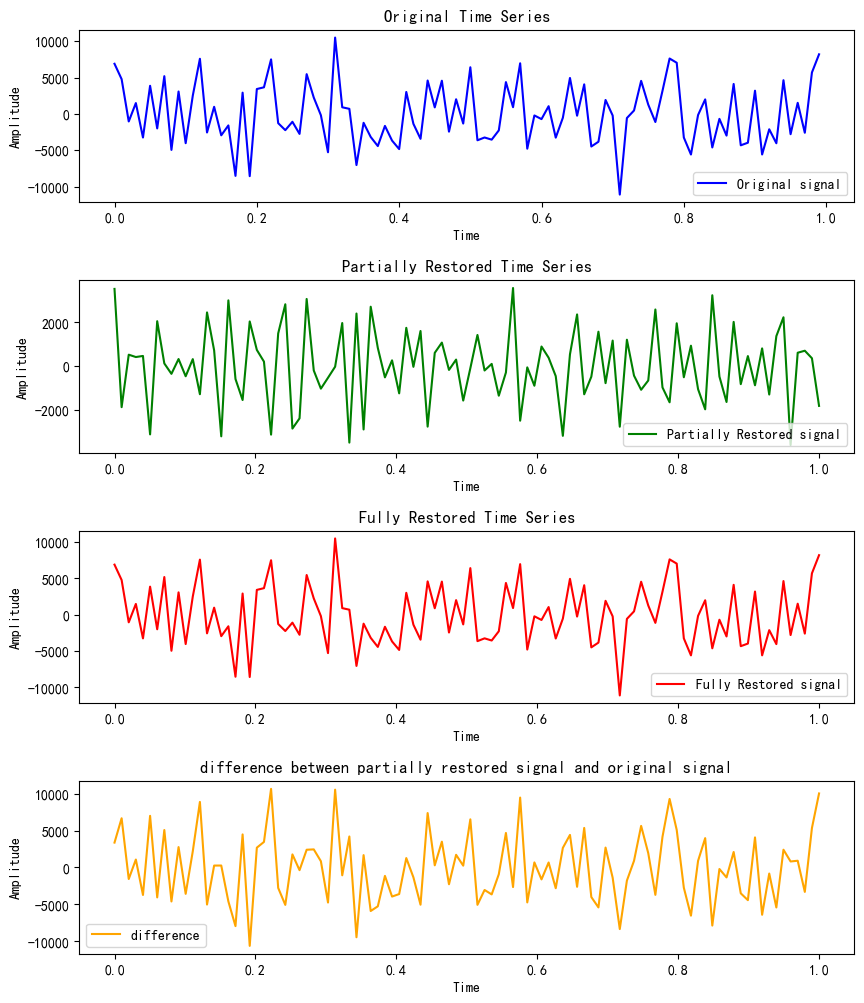

In [221]:
%matplotlib inline
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(4, 1, figsize=(10, 12))
fig.subplots_adjust(hspace=0.45)

sub_fig1 = ax[0]
sub_fig2 = ax[1]
sub_fig3 = ax[2]
sub_fig4 = ax[3]

sub_fig1.plot(t, signal, 'b', label='Original signal')
sub_fig1.set_title("Original Time Series")
sub_fig1.set_xlabel('Time')
sub_fig1.set_ylabel('Amplitude')
sub_fig1.legend(loc="best")

sub_fig2.plot(np.linspace(0,1.0,100), np.abs(fft_pitime)*fft_pitime.real/np.abs(fft_pitime), 
              'g', label='Partially Restored signal')
sub_fig2.set_title("Partially Restored Time Series")
sub_fig2.set_xlabel('Time')
sub_fig2.set_ylabel('Amplitude')
sub_fig2.legend(loc="best")

sub_fig3.plot(np.linspace(0,1.0,100), np.abs(fft_fitime)*fft_fitime.real/np.abs(fft_fitime), 
              'r', label='Fully Restored signal')
sub_fig3.set_title("Fully Restored Time Series")
sub_fig3.set_xlabel('Time')
sub_fig3.set_ylabel('Amplitude')
sub_fig3.legend(loc="best")

sub_fig4.plot(np.linspace(0,1.0,100), signal - np.abs(fft_pitime)*fft_pitime.real/np.abs(fft_pitime), 
              'orange', label='difference')
sub_fig4.set_title("difference between partially restored signal and original signal")
sub_fig4.set_xlabel('Time')
sub_fig4.set_ylabel('Amplitude')
sub_fig4.legend(loc="best")

plt.show()

# Others
1. numpy could handle complex number 
    > real will return real part of certain complex number <br>
    > imag will return imaginary part of certain complex number <br>
2. numpy abs() function will calculate norm of complex number

In [137]:
print("original complex number:")
print(fft_result[1])
print("------------------------")
print("norm of complex number using np.abs():")
print(np.abs(fft_result[1]))
print("------------------------")
print("get real and imaginary part of one complex number:")
print("real part:", fft_result[1].real, "\nimaginary part:", fft_result[1].imag)

original complex number:
(-4.9745931776365335+1.0860014237498428j)
------------------------
norm of complex number using np.abs():
5.0917557262082624
------------------------
get real and imaginary part of one complex number:
real part: -4.9745931776365335 
imaginary part: 1.0860014237498428


In [195]:
num = 91
print(signal[num])
print(fft_pitime[num])
print(np.abs(fft_pitime[num])*fft_pitime[num].real/np.abs(fft_pitime[num].real))

600.250052808021
(-12.513508011285298+63.246844530915844j)
-64.47287201502924


In [197]:
print(signal - np.abs(fft_pitime)*fft_pitime.real/np.abs(fft_pitime))

[-226.24161578  112.79636936  681.11505506 -116.30364193 -256.74830369
  320.51344694  433.53966612  -93.52340004   24.21907645   -7.64851302
  200.18315013 -212.0689305   348.36654356   61.41716612  290.36078295
 -691.95155034 -673.35534431 -118.97426441 -410.26306852  232.66285727
  -59.56245762  405.41919647  256.4057012   383.57111421  544.14693201
 -224.77320227   93.46519764  284.33426578  -65.61685531  412.46795187
 -189.55765028   62.22889222  -66.14548212 -153.95786636 -595.69371805
 -318.51842581 -471.0802137  -306.15541257 -228.43182459 -189.14691536
  333.03245465  230.27748323  343.51544564  683.7996107   306.37985474
  318.4628308   717.28694073   18.05728792 -357.61054886   66.35254381
 -175.75291913   80.43127031  507.31689125 -137.5236062  -424.37405782
 -122.28553782    2.56991462 -384.20092009 -572.2208845   -47.37657077
   38.24788251  798.69543667 -410.59211081  145.40477457  746.40470947
  -83.93669954  129.28525294  171.56193455 -375.09306477  298.93608025
 -260.